In [7]:
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv('results.csv')
df.head()

images_dir = 'images'
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

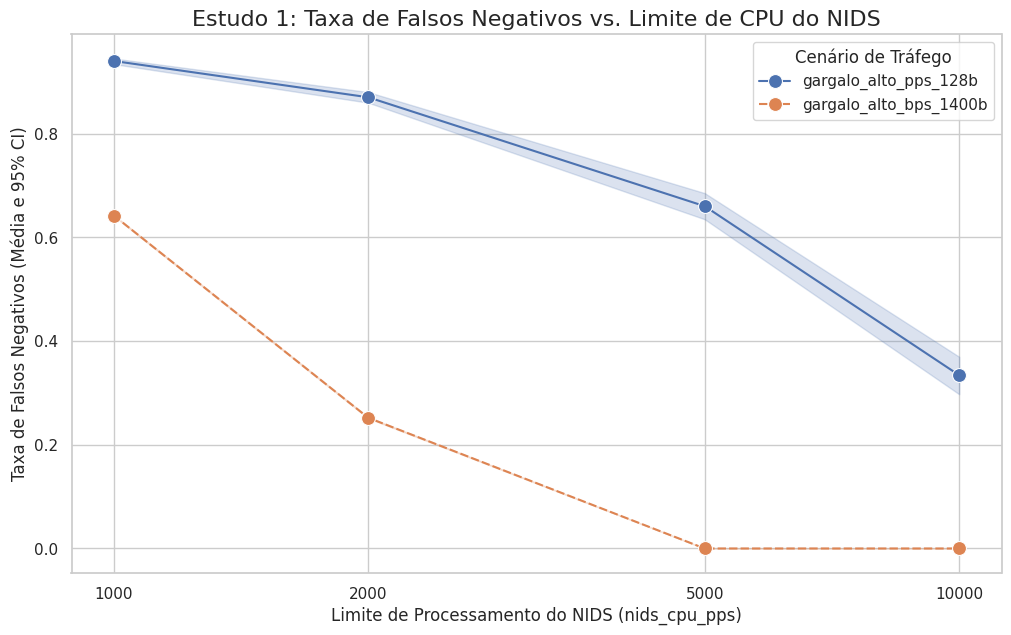

In [9]:
sns.set_theme(style="whitegrid")

df_estudo1_gargalo = df[(df['estudo'] == 'estudo_1') & (df['cenario'].str.contains('gargalo'))].copy()

df_estudo1_gargalo['nids_cpu_pps_log'] = pd.to_numeric(df_estudo1_gargalo['nids_cpu_pps'], errors='coerce')

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df_estudo1_gargalo,
    x='nids_cpu_pps_log',
    y='taxa_falsos_negativos',
    hue='cenario',
    style='cenario',
    marker='o',
    markersize=10
)

plt.title('Estudo 1: Taxa de Falsos Negativos vs. Limite de CPU do NIDS', fontsize=16)
plt.xlabel('Limite de Processamento do NIDS (nids_cpu_pps)', fontsize=12)
plt.ylabel('Taxa de Falsos Negativos (Média e 95% CI)', fontsize=12)
plt.xscale('log')
plt.xticks(df_estudo1_gargalo['nids_cpu_pps_log'].unique(), labels=df_estudo1_gargalo['nids_cpu_pps'].unique())
plt.legend(title='Cenário de Tráfego')
plt.savefig(os.path.join(images_dir, 'estudo1_falsos_negativos.png'))
plt.show()

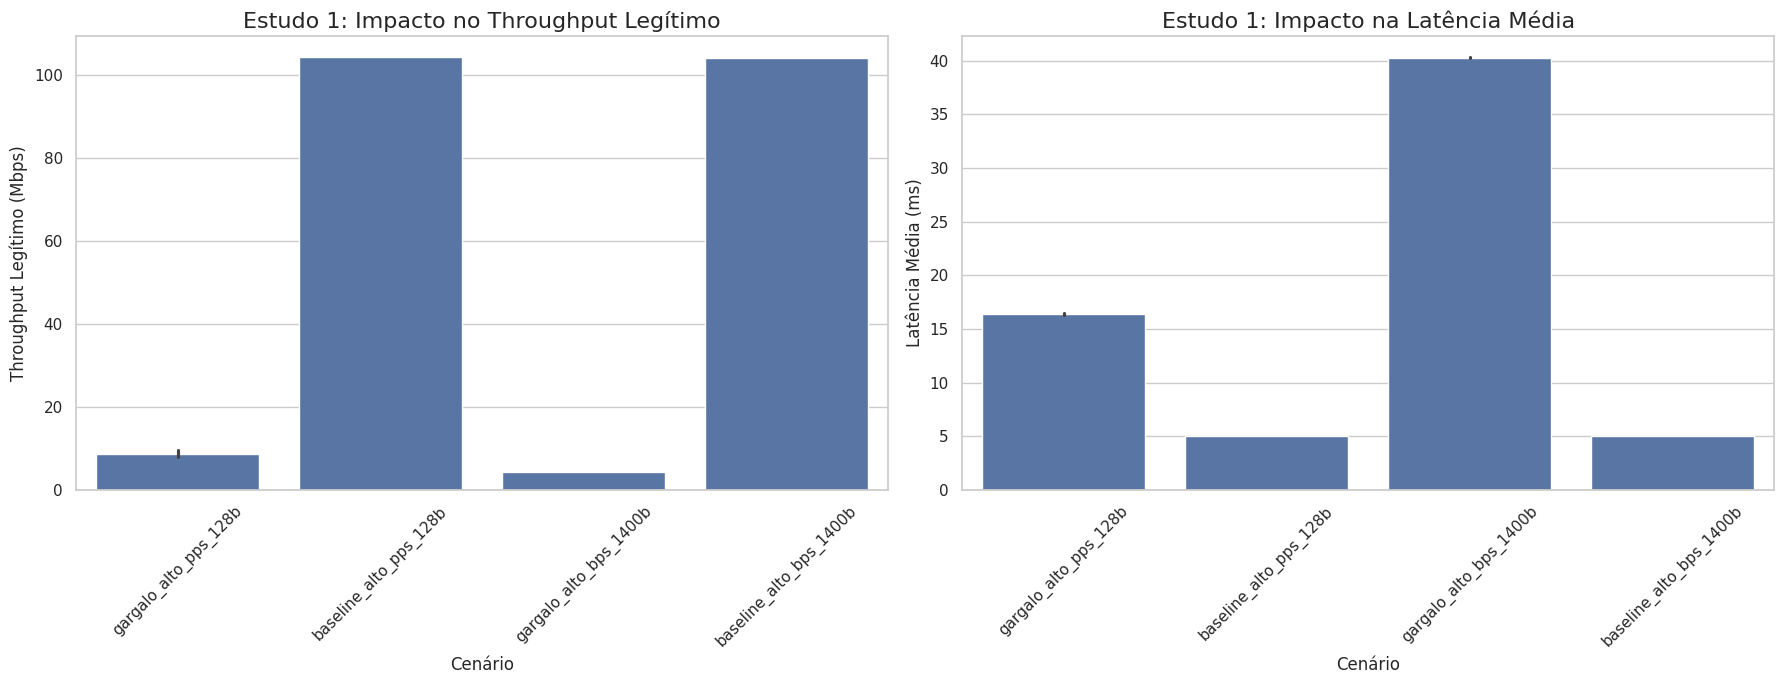

In [11]:
df_estudo1 = df[df['estudo'] == 'estudo_1'].copy()

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.barplot(
    ax=axes[0],
    data=df_estudo1,
    x='cenario',
    y='throughput_legitimo_mbps'
)
axes[0].set_title('Estudo 1: Impacto no Throughput Legítimo', fontsize=16)
axes[0].set_xlabel('Cenário', fontsize=12)
axes[0].set_ylabel('Throughput Legítimo (Mbps)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    ax=axes[1],
    data=df_estudo1,
    x='cenario',
    y='latencia_media_ms'
)
axes[1].set_title('Estudo 1: Impacto na Latência Média', fontsize=16)
axes[1].set_xlabel('Cenário', fontsize=12)
axes[1].set_ylabel('Latência Média (ms)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'estudo1_desempenho.png'))
plt.show()

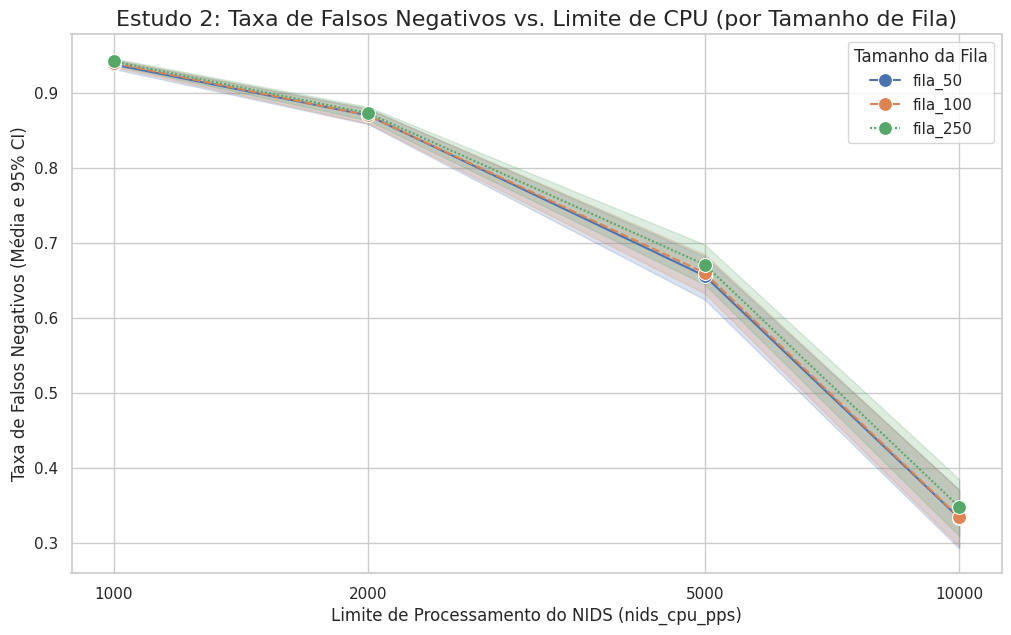

In [12]:
df_estudo2_filas = df[(df['estudo'] == 'estudo_2') & (df['cenario'].str.contains('fila'))].copy()

df_estudo2_filas['nids_cpu_pps_log'] = pd.to_numeric(df_estudo2_filas['nids_cpu_pps'], errors='coerce')

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df_estudo2_filas,
    x='nids_cpu_pps_log',
    y='taxa_falsos_negativos',
    hue='cenario',
    style='cenario',
    marker='o',
    markersize=10
)

plt.title('Estudo 2: Taxa de Falsos Negativos vs. Limite de CPU (por Tamanho de Fila)', fontsize=16)
plt.xlabel('Limite de Processamento do NIDS (nids_cpu_pps)', fontsize=12)
plt.ylabel('Taxa de Falsos Negativos (Média e 95% CI)', fontsize=12)
plt.xscale('log')
plt.xticks(df_estudo2_filas['nids_cpu_pps_log'].unique(), labels=df_estudo2_filas['nids_cpu_pps'].unique())
plt.legend(title='Tamanho da Fila')
plt.savefig(os.path.join(images_dir, 'estudo2_falsos_negativos.png'))
plt.show()

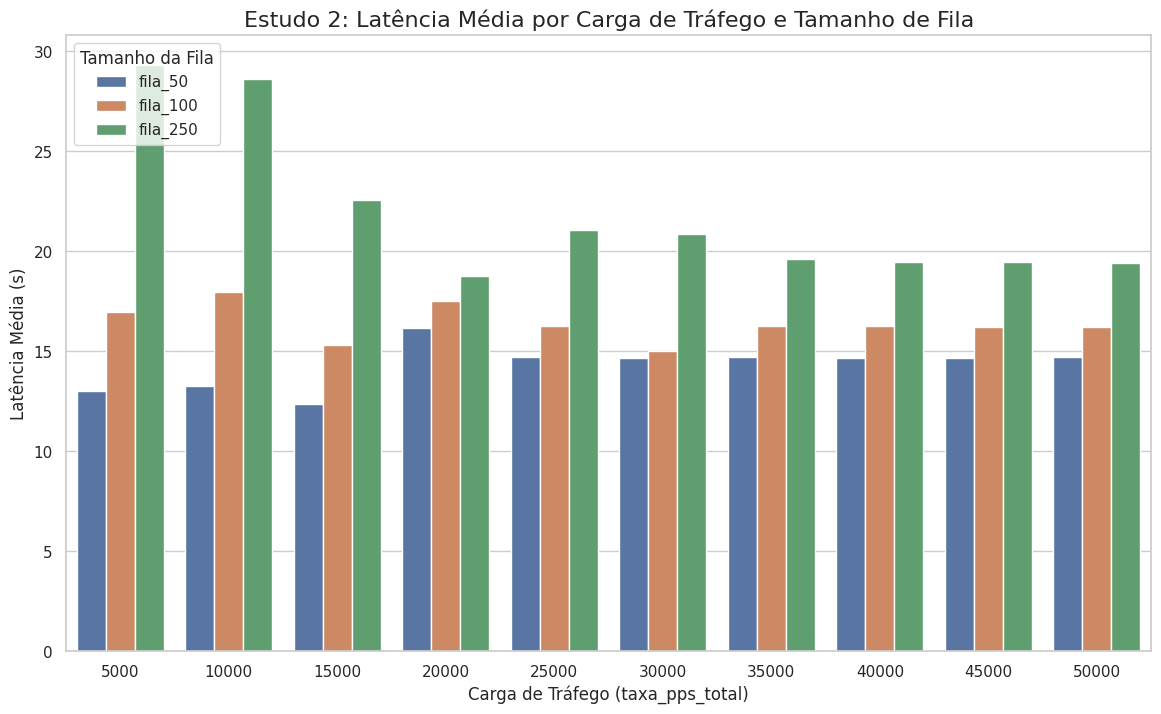

In [13]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_estudo2_filas,
    x='taxa_pps_total',
    y='latencia_media_ms',
    hue='cenario'
)
plt.title('Estudo 2: Latência Média por Carga de Tráfego e Tamanho de Fila', fontsize=16)
plt.xlabel('Carga de Tráfego (taxa_pps_total)', fontsize=12)
plt.ylabel('Latência Média (s)', fontsize=12)
plt.legend(title='Tamanho da Fila', loc='upper left')
plt.savefig(os.path.join(images_dir, 'estudo2_latencia_fila.png'))
plt.show()